# Downloading Data

## Setting up and using Globus

We've seen how to search and download the ASDF metadata files with Fido.
However, the actual data files are distributed using [Globus](https://www.globus.org/data-transfer)
For the next portion of the workshop you will need to be running Globus Connect Personal, so follow the installation instructions for your platform [here](https://www.globus.org/globus-connect-personal) if you haven't already.
During the setup, you will need to login to Globus.
For this you can use your login for your institution, or alternatively you can login with Google or ORCID.

Once Globus is installed and set up, you will need to run Globus Connect Personal (GCP) as described on the installation page.
You will need to do this every time you want to download data, either through the user tools or through the Globus web app.
When you start GCP You may also want to define the location or locations on your computer which you want Globus to have access to.
On Linux you can do this using the `-restrict-paths` command line argument, or by editing the config file.
On Windows and Mac OS this option is in the "Access" tab of the configuration options.
Globus will only be able to transfer files onto your machine in the specified paths.

### The Globus web app

Many of you will already be familiar with using the [Globus web app](https://app.globus.org/) to download data.
If you are not, you should read through the [getting started docs here](https://docs.globus.org/how-to/get-started/).
We will not be using the web app significantly for this workshop, and generally we don't recommend downloading data this way, since the user tools are better suited to navigating the quantities of data that DKIST provides.
However, we will be going over how to use the web app now so that we can demonstrate some of the underlying concepts.

**Endpoints** (also called **Collections** in the web app) are locations registered with Globus for data transfer.
For example, you may want to define an endpoint for both your desktop machine in the office and your laptop, so that you can download data on each depending on where you're working.
You would then be able to transfer data directly from one to the other using Globus.
Many institutions will have their own Globus endpoints, such as a computing cluster, that you may have access to.
DKIST has an endpoint called "DKIST Data Transfer", which is where DKIST data will be made available.

**Paths** When working with paths in Globus it's worth remembering that the paths are as the Globus endpoint sees them, so might not be identical to how you refer to them on your local system.

To start a data transfer from one endpoint to another, go to the "File Manager" tab of the web app.
Here you will find a split screen - on either side you can select an endpoint in the "Collection" search box.
(If you do not see the split screen, find and click the "set two pane" button in the top right hand corner of the page.)
Select "DKIST Data Transfer" on the left hand side and the endpoint corresponding to your local machine on the right.
Then you can navigate the file system on either machine (remembering that Globus will only have access to whichever local directories you've specified).

Let's demonstrate a simple file transfer by grabbing the preview movie for a dataset.
On the right hand side in your local endpoint, navigate to a suitable place to download the movie.
Then on the left hand side navigate to `/data/pid_1_123/BEOGN/`.
We will use this dataset for this and some other examples later in this session.
You should see a list of the files available in this dataset, mostly the data stored in `.fits` format.
Select the preview movie, `BEOGN.mp4`, by clicking the checkbox next to it, then click the "Start" button above the file list to begin the download.

![](./globus1.png)

You can check the progress of your transfer by going to the "Activity" tab, which shows both active and previous transfers.
Various useful information is displayed here but for now the most important is whether the transfer task has failed or succeeded.

![](./globus2.png)

In either case Globus will also send an email to your registered email address when the task finishes.
Of course in this trivial example this is unneccessary, but if you're transfering a whole large dataset it will likely take some time to download and it may be useful to be notified when it's complete.
You do not need to leave the web app open for the transfer to continue, but remember that you do need to have GCP running - so if you stop it then your data download will stop as well.

If you try transfering the same file again to the same location, you will find that the task completes successfully but the file is not actually transferred.
This is to save download time and avoid duplication.

## Dataset and downloading

Now that we've been over the basic concepts of how data downloads work in Globus, let's see how to do it with the user tools.
For this section we don't recommend that you run the download commands as we go through the workshop unless you're willing to wait for them to complete, which may take some time.
First let's reload the VBI dataset we were using before.

In [5]:
import dkist
import dkist.net
from sunpy.net import Fido, attrs as a

tds = dkist.Dataset.from_directory("/home/stuart/sunpy/data/VBI/BLKGA/")
ds = tds[0, 0]

As we saw earlier, we can use the `files` attribute to access information about the number and names of files in the dataset even before downloading any.

In [7]:
print(ds.files)
print(ds.files.filenames)

FileManager containing 19 files with each array having shape (4096, 4096)
['VBI_2022_06_02T17_22_50_173_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_24_12_433_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_25_34_693_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_26_56_953_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_28_19_213_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_29_41_473_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_31_03_733_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_32_25_993_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_33_48_253_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_35_10_513_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_36_32_773_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_37_55_033_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_39_17_293_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_40_39_553_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_42_01_813_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_43_24_073_00486136_I_BLKGA_L1.fits', 'VBI_2022_06_02T17_44_46_333_

The `files` attribute has a `download()` method that we will use for downloading the data.
In order to speed up this demonstration a bit, we will just download the first file.
To do this we can slice the dataset so that we're only accessing the portion of the data saved in the first file, paying attention to the chunking information in the `Dataset`:

In [11]:
ds.files.download()

|                                                                                                             …

PENDING: Starting Transfer
Task completed with SUCCEEDED status.


<WCSAxes: >

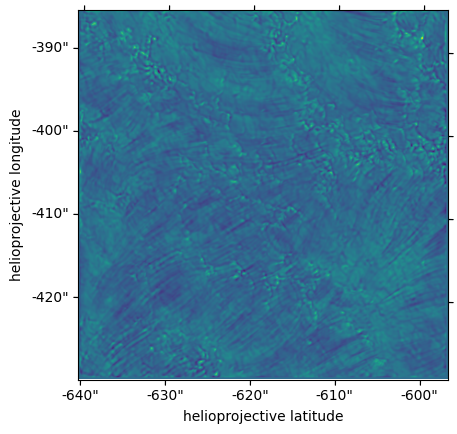

In [10]:
ds[0].plot()

The default download directory used by `donwload()` is in the same folder as the ASDF file we loaded, so in this case `~/sunpy/data/VBI/BLKGA`.
Since the `download()` method set up the transfer through globus, you can check on the status of your download in the activity tab of the web app as we saw earlier.

We can change the download location of the files using the `path` argument.
But remember that whatever path you specify must be accessible by Globus Connect Personal.

In [ ]:
ds[0].files.download(path="~/data/dkist/wibble/")

The `path` keyword will replace placeholders in the path in the same way as we saw with `Fido.fetch()`.
Any key in the dataset inventory (`ds.meta['inventory']`) can be used for this.
So for example:

In [12]:
ds[0].files.download(path="~/sunpy/data/{dataset_id}")

|                                                                                                             …

PENDING: Starting Transfer
Task completed with SUCCEEDED status.


would save the file to `~/sunpy/data/BLKGA/VBI_2022_06_02T17_22_50_173_00486136_I_BLKGA_L1.fits`.

If we know that we will want to download an entire dataset, this can be done in the same way but using the full dataset object.

In [13]:
ds.files.download()

|                                                                                                             …

PENDING: Starting Transfer
Task completed with SUCCEEDED status.


Alternatively, the user tools offer another function which can also be used to download a full dataset.
The `transfer_complete_datasets()` function can take a Fido search results object and download full datasets:

In [14]:
results = Fido.search(a.Instrument("VBI"), a.Time("2022-06-03 17:00", "2022-06-03 18:00"), a.dkist.Embargoed(False))
dkist.net.transfer_complete_datasets(results[0])

|                                                                                                             …

PENDING: Starting Transfer
Cancelling Task


PosixPath('/~/pid_1_118/BDOVA')

Notice that we have to specify `results["dkist"]` here, because `transfer_complete_datasets` only works for DKIST datasets, not any other kind of result that Fido might return.

We can also download many datasets at once.
For example if we have a proposal ID that we want to download all the data for we could run:

In [ ]:
results = Fido.search(a.dkist.Proposal("pid_1_123"))
dkist.net.transfer_complete_datasets(results)

This will iterate over the results and download each dataset in turn, with a progress bar for each.

Of course, if this is a dataset you already know you will want to download all of - for example if it's your own observation - then you may not need to find it through Fido first.
Fortunately, `transfer_complete_datasets()`, also lets you specify a dataset or datasets for which to download all files, by passing the dataset IDs.

In [16]:
dkist.net.transfer_complete_datasets("BLKGA", destination_endpoint="dolgoch", wait=False)

PosixPath('/~/pid_1_118/BLKGA')

Both `transfer_complete_datasets()` and `ds.files.download()` also allow you to specify remote endpoints using the `destination_endpoint` keyword.

Normally both of these functions will block the terminal while the download is active.
If you want to download a lot of data this is probably not useful, so you can turn this functionality off by passing `wait=False`.
This will set up the transfer in Globus but then return from the function.
Of course, be cautious with this approach if the next step of your code depends on the data being present.
Setting `wait=False` will also skip the wait at the end of each dataset if downloading more than one, so all the transfers will be set up on Globus and then the function will return.

To demonstrate this, let's grab some data for the next session, which will be on visualisation.
We will want a multi-dimensional dataset, so let's use the VISP one we looked at in the last session.

In [17]:
ds = dkist.Dataset.from_directory("~/sunpy/data/VISP/AGLKO")
ds.files.download(wait=False)

Here we're setting the data to download, but notice that the function has returned almost immediately, so we can close the notebook and continue to the next session without interrupting it.